In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline
kkk = 1

In [16]:
def g(x):
    return np.e**(-2*np.sin(2*x)) + 2*np.cos(2*x)
a = -np.pi
b = 2 * np.pi

In [17]:
def fun_painter(a, b, func, names, points = None, title=None):
    global kkk
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(len(func)):
        x = np.linspace(a, b, 1000)
        y = func[i](x)
        plt.plot(x, y, label=names[i])
    plt.legend()
    if title is not None:
        plt.title(title)
    if points is not None:
        plt.plot(points[0], points[1], marker='o', linestyle='')
    name = "wykres" + str(kkk) + ".png"
    #plt.savefig(name,bbox_inches='tight')
    #kkk+=1
    plt.show()

In [18]:
def generate_regular(a, b, f, n):
    x = np.linspace(a, b, n)
    y = f(x)
    return x, y

thousand_test_points = np.linspace(a, b, 1000) 

In [19]:
def generate_chebyshev(a, b, f, n):
    x = []
    for k in range(n, 0, -1):
        x.append(.5*(a+b) + .5*(b-a)*np.cos((2*k-1)*np.pi/(2*n)))
    x = np.array(x)
    y = f(x)
    return x, y

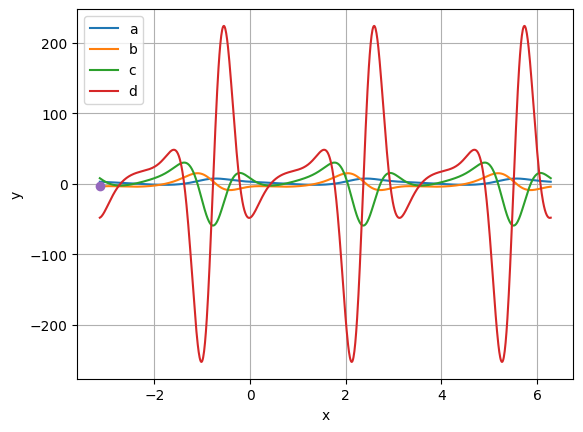

In [24]:
x = sp.symbols('x')

f = sp.exp(-2*sp.sin(2*x)) + 2*sp.cos(2*x)

f_prime = sp.diff(f, x)

f_prime2 = sp.diff(f_prime, x)

f_prime3 = sp.diff(f_prime2, x)


g1 = sp.lambdify(x, f_prime)
g2 = sp.lambdify(x, f_prime2)
g3 = sp.lambdify(x, f_prime3)
fun_painter(a,b,[g, g1, g2, g3],["a","b","c","d"],thousand_test_points)

In [21]:
def h(xs, ys, m, poch):
    l = 1 + (len(xs)-1)*m
    f_arr = [[(ys[0],xs[0])]]
    for i in range(1,len(xs)):
        for j in range(m):
            f_arr.append([(ys[i],xs[i])])
    for i in range(1, l):
        for j in range(1, i+1):
            if f_arr[i][0][1] != f_arr[i-j][0][1]:
                f_arr[i].append((f_arr[i][j-1][0] - f_arr[i-1][j-1][0]) / (f_arr[i][0][1] - f_arr[i-j][0][1]))
            else:
                f_arr[i].append(
    def f(x):
        y = ys[0]
        for ii in range(1, l):
            temp = f_arr[ii][ii]
            for jj in range(ii):
                temp *= (x - xs[jj])
            y += temp
        return y
    return f